<a href="https://colab.research.google.com/github/elenipapadopoulou4/thesis-code/blob/main/Emotion_Recognition_AffectNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"AffectNet" <br>

*Number to Emotion* <br>
0: Neutral <br>
1: Happiness  <br>
2: Sadness  <br>
3: Surprise  <br>
4: Fear  <br>
5: Disgust  <br>
6: Anger  <br>
7: Contempt  <br>
8: None  <br>
9: Uncertain  <br>
10: No-Face  <br>

In [ ]:
import tensorflow as tf


import os 
import matplotlib.pyplot as plt

import numpy as np
import cv2


import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint 

from sklearn.metrics import classification_report, confusion_matrix,recall_score,f1_score

import csv

import matplotlib.image as mpimg

from keras.models import model_from_json
import json

from keras import backend as K
from csv import reader


from PIL import Image

from collections import Counter
from tabulate import tabulate

import joblib

import shutil

from zipfile import ZipFile


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [ ]:
!tar -xvf  '/content/gdrive/MyDrive/train_net/datasets/affectnet_new/train_set.tar' -C '/content'

In [ ]:
!rm -r /content/train_set/annotations/

In [ ]:
!tar -xvf  '/content/gdrive/MyDrive/train_net/datasets/affectnet_new/val_set.tar' -C '/content'

In [ ]:
# folder path
dir_path = "/content/train_set/images"
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    count += 1
print('File count:', count)

File count: 287651


In [ ]:
# folder path
dir_path = "/content/val_set/images"
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    count += 1
print('File count:', count)

File count: 3999


In [ ]:
dataset_train_path = '/content/train_set/images'
dataset_val_path = '/content/val_set/images'

ff_outputs_train = '/content/gdrive/MyDrive/train_net/affectnet_train_ff'
ff_outputs_val = '/content/gdrive/MyDrive/train_net/FairFace/AffectNet_val_outputs.csv'

## get data

In [ ]:
'''
train_valence_values = {}
train_arousal_values = {}
train_expression_values = {}
for npy in os.listdir(train_annotations):
     if npy.endswith('npy'):
       if npy[-7:-4] == 'val':
         train_valence_values[npy[0:-8]+'.jpg'] = float(np.load(os.path.join(train_annotations,npy)))
       elif npy[-7:-4] == 'aro':
         train_arousal_values[npy[0:-8]+'.jpg']  = float(np.load(os.path.join(train_annotations,npy)))
       elif npy[-7:-4] == 'exp':
         train_expression_values[npy[0:-8]+'.jpg'] = int(np.load(os.path.join(train_annotations,npy)))
'''

In [ ]:
#len(train_arousal_values),len(train_expression_values),len(train_valence_values)

(58729, 58730, 58730)

In [ ]:
'''
joblib.dump(train_valence_values,'/content/gdrive/MyDrive/train_net/affectnet7/train_valence_values_unzip')
joblib.dump(train_arousal_values,'/content/gdrive/MyDrive/train_net/affectnet7/train_arousal_values_unzip')
joblib.dump(train_expression_values,'/content/gdrive/MyDrive/train_net/affectnet7/train_expression_values_unzip')
'''

train_valence_values = joblib.load('/content/gdrive/MyDrive/train_net/affectnet7/train_valence_values_unzip')
train_arousal_values = joblib.load('/content/gdrive/MyDrive/train_net/affectnet7/train_arousal_values_unzip')
train_expression_values = joblib.load('/content/gdrive/MyDrive/train_net/affectnet7/train_expression_values_unzip')


In [ ]:
'''
val_valence_values = {}
val_arousal_values = {}
val_expression_values = {}
for npy in os.listdir(val_annotations):
  if npy[-7:-4] == 'val':
    val_valence_values[npy[0:-8]+'.jpg'] = float(np.load(os.path.join(val_annotations,npy)))
  elif npy[-7:-4] == 'aro':
    val_arousal_values[npy[0:-8]+'.jpg']  = float(np.load(os.path.join(val_annotations,npy)))
  elif npy[-7:-4] == 'exp':
    val_expression_values[npy[0:-8]+'.jpg'] = int(np.load(os.path.join(val_annotations,npy)))
'''

In [ ]:
#joblib.dump(val_valence_values,'/content/gdrive/MyDrive/train_net/affectnet7/val_valence_values')
#joblib.dump(val_arousal_values,'/content/gdrive/MyDrive/train_net/affectnet7/val_arousal_values')
#joblib.dump(val_expression_values,'/content/gdrive/MyDrive/train_net/affectnet7/val_expression_values')

val_valence_values = joblib.load('/content/gdrive/MyDrive/train_net/affectnet7/val_valence_values')
val_arousal_values = joblib.load('/content/gdrive/MyDrive/train_net/affectnet7/val_arousal_values')
val_expression_values = joblib.load('/content/gdrive/MyDrive/train_net/affectnet7/val_expression_values')

In [ ]:
'''
#TRAIN SET
#create dataframe with image_path annotations ffoutputs
image_names_train = list(train_expression_values.keys())
image_names_train.remove('397216.jpg')

df_train_first = pd.DataFrame(index =[i for i in range(len(image_names_train))], columns=['face_name_align','valence','arousal','expression'])

for i,image_name in enumerate(image_names_train):
  df_train_first['face_name_align'][i] = os.path.join(dataset_train_path,image_name)
  df_train_first['valence'][i] = train_valence_values[image_name]
  df_train_first['arousal'][i] = train_arousal_values[image_name]
  df_train_first['expression'][i] = train_expression_values[image_name]

'''
  

In [ ]:
#joblib.dump(df_train_first,'/content/gdrive/MyDrive/train_net/affectnet7/df_train_first')
df_train_first = joblib.load('/content/gdrive/MyDrive/train_net/affectnet7/df_train_first')

In [ ]:
for i, row in df_train_first.iterrows():
    df_train_first['face_name_align'][i] = '/'+ df_train_first['face_name_align'][i]

In [ ]:
#VALIDATION SET
#create dataframe with image_path annotations ffoutputs
df_val_first = pd.DataFrame(index =[i for i in range(len(val_expression_values))], columns=['face_name_align','valence','arousal','expression'])

for i,image_name in enumerate(val_expression_values.keys()):
  df_val_first['face_name_align'][i] = os.path.join(dataset_val_path,image_name)
  df_val_first['valence'][i] = val_valence_values[image_name]
  df_val_first['arousal'][i] = val_arousal_values[image_name]
  df_val_first['expression'][i] = val_expression_values[image_name]

In [ ]:
df_train_first

,face_name_align,valence,arousal,expression
0,/content/train_set/images/102819.jpg,-0.404762,0.47619,6
1,/content/train_set/images/364716.jpg,0.754936,0.101626,1
2,/content/train_set/images/50848.jpg,0.714286,-0.174603,1
3,/content/train_set/images/228471.jpg,-0.425861,0.445219,7
4,/content/train_set/images/324085.jpg,-0.029036,0.701703,4
...,...,...,...,...
287645,/content/train_set/images/329316.jpg,0.285714,-0.5,1
287646,/content/train_set/images/44921.jpg,0.004839,0.004839,0
287647,/content/train_set/images/21475.jpg,0.334889,0.803733,3
287648,/content/train_set/images/290369.jpg,-0.125823,0.783972,4


In [ ]:
df_val_first

,face_name_align,valence,arousal,expression
0,/content/val_set/images/5158.jpg,-0.542092,0.637755,7
1,/content/val_set/images/5166.jpg,-0.650794,0.634921,7
2,/content/val_set/images/5162.jpg,-0.663717,0.674252,7
3,/content/val_set/images/5156.jpg,-0.714286,0.484127,5
4,/content/val_set/images/5157.jpg,-0.750605,0.423729,5
...,...,...,...,...
3994,/content/val_set/images/374.jpg,-0.634921,0.626984,7
3995,/content/val_set/images/364.jpg,-0.056073,0.901484,4
3996,/content/val_set/images/373.jpg,-0.72166,0.505689,5
3997,/content/val_set/images/371.jpg,-0.591463,0.619148,7


get ff outputs

In [ ]:
filenames = [os.path.join(ff_outputs_train,'AffectNet_{}_outputs.csv'.format(i)) for i in range(1,6)]
df_ff_train = pd.concat([pd.read_csv(f) for f in filenames],ignore_index=True)
df_ff_val =  pd.read_csv(ff_outputs_val,header=0)

In [ ]:
df_ff_train

,face_name_align,race,race4,gender,age,race_scores_fair,race_scores_fair_4,gender_scores_fair,age_scores_fair
0,/content/AffectNet_1/338014_face0.jpg,White,White,Female,30-39,[9.9768430e-01 8.3404842e-07 4.9557548e-04 7.8...,[9.9954402e-01 3.9155115e-05 2.5423578e-04 1.6...,[0.00108848 0.99891156],[3.2951343e-07 1.2045196e-05 2.1958181e-03 1.8...
1,/content/AffectNet_1/375157_face0.jpg,Latino_Hispanic,Indian,Male,40-49,[4.1867331e-02 2.8939501e-03 6.4703292e-01 5.6...,[0.12259621 0.0118882 0.05346854 0.812047 ],[9.9996817e-01 3.1774376e-05],[4.0918812e-06 7.8763378e-06 3.4319554e-04 6.0...
2,/content/AffectNet_1/200275_face0.jpg,White,White,Female,30-39,[9.3027109e-01 3.3412536e-05 2.3007229e-02 2.5...,[9.9081391e-01 1.3344680e-04 8.5778935e-03 4.7...,[1.8520598e-04 9.9981475e-01],[6.8551217e-06 1.1402138e-04 3.4821026e-03 1.7...
3,/content/AffectNet_1/360308_face0.jpg,White,White,Male,30-39,[9.4943702e-01 1.2681483e-04 3.7268560e-02 2.4...,[0.9596314 0.00265455 0.03190337 0.00581068],[9.9992162e-01 7.8419835e-05],[2.6640939e-07 7.8098519e-06 3.0404450e-03 1.7...
4,/content/AffectNet_1/271949_face0.jpg,White,White,Female,20-29,[8.1033128e-01 2.0921198e-04 6.5465964e-02 2.5...,[9.5564288e-01 1.0636623e-03 5.4119929e-04 4.2...,[1.2858528e-04 9.9987143e-01],[2.4723663e-08 1.4514101e-04 1.3773786e-01 8.2...
...,...,...,...,...,...,...,...,...,...
286978,/content/AffectNet_5/171443_face0.jpg,White,White,Male,30-39,[9.96919692e-01 2.35669813e-05 6.68789377e-04 ...,[9.9925607e-01 8.8422828e-05 4.6452900e-04 1.9...,[9.9980009e-01 1.9992943e-04],[9.9205442e-07 1.1403574e-05 1.3473213e-03 1.9...
286979,/content/AffectNet_5/173385_face0.jpg,Latino_Hispanic,White,Male,20-29,[4.3826342e-01 5.0255330e-04 4.5711330e-01 3.6...,[8.0660075e-01 5.2514666e-04 8.9431042e-03 1.8...,[9.9998039e-01 1.9585197e-05],[3.0622363e-07 5.0283674e-05 3.6764979e-02 9.1...
286980,/content/AffectNet_5/8624_face0.jpg,White,White,Female,30-39,[9.8222369e-01 4.7378286e-05 2.0902946e-03 5.6...,[9.9781388e-01 4.5846385e-04 1.1264893e-03 6.0...,[0.0246314 0.9753686],[4.8818447e-07 6.7148262e-06 4.1938745e-03 3.1...
286981,/content/AffectNet_5/138239_face0.jpg,White,White,Male,40-49,[9.0839660e-01 5.6781479e-05 5.5691369e-02 3.7...,[9.8595303e-01 3.3642695e-04 5.7543712e-03 7.9...,[9.999955e-01 4.464330e-06],[2.0427360e-05 1.5988575e-05 3.5392764e-04 2.3...


In [ ]:
df_ff_val

,face_name_align,race,race4,gender,age,race_scores_fair,race_scores_fair_4,gender_scores_fair,age_scores_fair
0,detected_faces/AffectNet_val/4113_face0.jpg,Latino_Hispanic,White,Male,30-39,[0.31216764 0.00197169 0.41665718 0.05613517 0...,[9.5367742e-01 6.4315589e-04 1.5072257e-02 3.0...,[9.9999887e-01 1.1290128e-06],[4.2755633e-07 4.2162819e-06 3.8639747e-04 1.1...
1,detected_faces/AffectNet_val/4110_face0.jpg,Latino_Hispanic,Indian,Male,3-9,[0.08383916 0.00204614 0.44882038 0.01973053 0...,[0.1248248 0.00773652 0.14837413 0.71906453],[0.7063238 0.2936762],[4.0366925e-02 8.4329814e-01 7.0053376e-02 7.2...
2,detected_faces/AffectNet_val/4127_face0.jpg,White,White,Male,30-39,[6.9719398e-01 3.0593885e-04 2.2943301e-01 4.5...,[9.9070179e-01 4.1081072e-04 1.0159063e-03 7.8...,[9.9971527e-01 2.8472077e-04],[5.3830149e-07 5.1383608e-06 1.8266974e-03 1.4...
3,detected_faces/AffectNet_val/4121_face0.jpg,White,White,Female,20-29,[6.8020886e-01 2.2140309e-02 1.4175938e-01 3.0...,[0.43483713 0.29590684 0.00679164 0.2624644 ],[4.1415144e-05 9.9995863e-01],[5.5950791e-09 1.9922987e-05 2.9159429e-02 7.7...
4,detected_faces/AffectNet_val/4137_face0.jpg,White,White,Male,50-59,[9.8788726e-01 6.0242769e-06 4.5971973e-03 2.1...,[9.9528795e-01 1.8223309e-05 1.5200167e-03 3.1...,[9.9986565e-01 1.3434306e-04],[1.6022175e-05 5.0782364e-06 6.0423572e-05 8.3...
...,...,...,...,...,...,...,...,...,...
3984,detected_faces/AffectNet_val/1347_face0.jpg,Latino_Hispanic,Indian,Female,20-29,[0.21230565 0.01436107 0.52702177 0.00132492 0...,[0.4421534 0.06180936 0.0121457 0.48389152],[0.00312264 0.9968774 ],[4.6040909e-06 9.1158580e-03 2.1185264e-01 7.3...
3985,detected_faces/AffectNet_val/1363_face0.jpg,White,White,Female,20-29,[8.4380847e-01 9.2411134e-04 5.6506217e-02 5.9...,[9.9896139e-01 1.4353133e-04 3.1601414e-04 5.7...,[0.00104368 0.9989563 ],[1.1628827e-06 2.4082775e-03 1.9528387e-01 7.1...
3986,detected_faces/AffectNet_val/1356_face0.jpg,White,White,Male,30-39,[9.6835798e-01 6.9678827e-05 4.1101687e-03 3.2...,[9.7101319e-01 4.8953405e-04 6.2169000e-03 2.2...,[0.9894317 0.01056833],[8.2140815e-07 8.2066699e-06 3.7469398e-04 1.2...
3987,detected_faces/AffectNet_val/1376_face0.jpg,Black,Black,Male,20-29,[1.0888006e-03 9.7212183e-01 1.7900083e-02 2.0...,[2.9056126e-04 9.9040282e-01 6.2239333e-03 3.0...,[0.9968558 0.00314421],[7.4133945e-06 1.2779753e-03 2.6421049e-01 6.3...


In [ ]:
#avoid double values  
#rename image path
#add images only if in subset
train_names_ff =[] #list with all names of images
for i, row in df_ff_train.iterrows():
  path = df_ff_train['face_name_align'][i]
  image_name = (path[path.rfind('/')+1:path.rfind('face')-1])+'.jpg'
  if (image_name in train_names_ff):
     df_ff_train.drop([i], axis=0, inplace=True)
  else:
    df_ff_train['face_name_align'][i] = os.path.join(dataset_train_path,image_name)
    train_names_ff.append(image_name)

In [ ]:
val_names_ff =[] #list with all names of images
for i, row in df_ff_val.iterrows():
  path = df_ff_val['face_name_align'][i]
  image_name = (path[path.rfind('/')+1:path.rfind('face')-1])+'.jpg'
  if image_name in val_names_ff:
     df_ff_val.drop([i], axis=0, inplace=True)
  else:
    df_ff_val['face_name_align'][i] = os.path.join(dataset_val_path,image_name)
    val_names_ff.append(image_name)


In [ ]:
df_ff_train = df_ff_train.drop(['race','race_scores_fair','race_scores_fair_4','gender_scores_fair','age_scores_fair'],axis=1)
df_ff_train = df_ff_train.rename(columns={"race4": "race"})

df_ff_val = df_ff_val.drop(['race','race_scores_fair','race_scores_fair_4','gender_scores_fair','age_scores_fair'],axis=1)
df_ff_val = df_ff_val.rename(columns={"race4": "race"})


In [ ]:
df_ff_train

,face_name_align,race,gender,age
0,/content/train_set/images/338014.jpg,White,Female,30-39
1,/content/train_set/images/375157.jpg,Indian,Male,40-49
2,/content/train_set/images/200275.jpg,White,Female,30-39
3,/content/train_set/images/360308.jpg,White,Male,30-39
4,/content/train_set/images/271949.jpg,White,Female,20-29
...,...,...,...,...
286978,/content/train_set/images/171443.jpg,White,Male,30-39
286979,/content/train_set/images/173385.jpg,White,Male,20-29
286980,/content/train_set/images/8624.jpg,White,Female,30-39
286981,/content/train_set/images/138239.jpg,White,Male,40-49


In [ ]:
df_ff_val

,face_name_align,race,gender,age
0,/content/val_set/images/4113.jpg,White,Male,30-39
1,/content/val_set/images/4110.jpg,Indian,Male,3-9
2,/content/val_set/images/4127.jpg,White,Male,30-39
3,/content/val_set/images/4121.jpg,White,Female,20-29
4,/content/val_set/images/4137.jpg,White,Male,50-59
...,...,...,...,...
3984,/content/val_set/images/1347.jpg,Indian,Female,20-29
3985,/content/val_set/images/1363.jpg,White,Female,20-29
3986,/content/val_set/images/1356.jpg,White,Male,30-39
3987,/content/val_set/images/1376.jpg,Black,Male,20-29


In [ ]:
# create training set 
df_train = (pd.merge(df_train_first, df_ff_train, on='face_name_align'))
print("lenght of train",len(df_train))


# create validation set 
df_val = (pd.merge(df_val_first, df_ff_val, on='face_name_align'))
print("lenght of validation",len(df_val))


lenght of train 286594
lenght of validation 3986


In [ ]:
df_train

,face_name_align,valence,arousal,expression,race,gender,age
0,/content/train_set/images/102819.jpg,-0.404762,0.47619,6,Indian,Male,30-39
1,/content/train_set/images/364716.jpg,0.754936,0.101626,1,White,Female,10-19
2,/content/train_set/images/50848.jpg,0.714286,-0.174603,1,White,Female,20-29
3,/content/train_set/images/228471.jpg,-0.425861,0.445219,7,Asian,Male,20-29
4,/content/train_set/images/324085.jpg,-0.029036,0.701703,4,White,Female,20-29
...,...,...,...,...,...,...,...
286589,/content/train_set/images/329316.jpg,0.285714,-0.5,1,White,Male,20-29
286590,/content/train_set/images/44921.jpg,0.004839,0.004839,0,White,Female,20-29
286591,/content/train_set/images/21475.jpg,0.334889,0.803733,3,White,Female,3-9
286592,/content/train_set/images/290369.jpg,-0.125823,0.783972,4,White,Male,50-59


In [ ]:
#save pandas dataframas
df_train.to_csv('/content/gdrive/MyDrive/train_net/datasets/affectnet/train_dataframe_final.csv',index=False)  
df_val.to_csv('/content/gdrive/MyDrive/train_net/datasets/affectnet/val_dataframe_final.csv',index=False)  


In [ ]:
df_train

,face_name_align,valence,arousal,expression,race,gender,age
0,/content/train_set/images/102819.jpg,-0.404762,0.47619,6,Indian,Male,30-39
1,/content/train_set/images/364716.jpg,0.754936,0.101626,1,White,Female,10-19
2,/content/train_set/images/50848.jpg,0.714286,-0.174603,1,White,Female,20-29
3,/content/train_set/images/228471.jpg,-0.425861,0.445219,7,Asian,Male,20-29
4,/content/train_set/images/324085.jpg,-0.029036,0.701703,4,White,Female,20-29
...,...,...,...,...,...,...,...
286589,/content/train_set/images/329316.jpg,0.285714,-0.5,1,White,Male,20-29
286590,/content/train_set/images/44921.jpg,0.004839,0.004839,0,White,Female,20-29
286591,/content/train_set/images/21475.jpg,0.334889,0.803733,3,White,Female,3-9
286592,/content/train_set/images/290369.jpg,-0.125823,0.783972,4,White,Male,50-59


In [ ]:
df_val

,face_name_align,valence,arousal,expression,race,gender,age
0,/content/val_set/images/5158.jpg,-0.542092,0.637755,7,Black,Male,20-29
1,/content/val_set/images/5166.jpg,-0.650794,0.634921,7,White,Female,60-69
2,/content/val_set/images/5162.jpg,-0.663717,0.674252,7,Indian,Male,20-29
3,/content/val_set/images/5156.jpg,-0.714286,0.484127,5,White,Male,30-39
4,/content/val_set/images/5157.jpg,-0.750605,0.423729,5,White,Male,50-59
...,...,...,...,...,...,...,...
3981,/content/val_set/images/374.jpg,-0.634921,0.626984,7,White,Female,20-29
3982,/content/val_set/images/364.jpg,-0.056073,0.901484,4,Black,Male,0-2
3983,/content/val_set/images/373.jpg,-0.72166,0.505689,5,White,Female,30-39
3984,/content/val_set/images/371.jpg,-0.591463,0.619148,7,White,Female,20-29


# Before split

In [ ]:
#read dataframe from csv
df_train = pd.read_csv('/content/gdrive/MyDrive/train_net/datasets/affectnet/train_dataframe_final.csv') 
df_val = pd.read_csv('/content/gdrive/MyDrive/train_net/datasets/affectnet/val_dataframe_final.csv') 
df_train = df_train.drop(['valence','arousal'],axis=1)
df_val = df_val.drop(['valence','arousal'],axis=1)

In [ ]:
df_train

,face_name_align,expression,race,gender,age
0,/content/train_set/images/102819.jpg,6,Indian,Male,30-39
1,/content/train_set/images/364716.jpg,1,White,Female,10-19
2,/content/train_set/images/50848.jpg,1,White,Female,20-29
3,/content/train_set/images/228471.jpg,7,Asian,Male,20-29
4,/content/train_set/images/324085.jpg,4,White,Female,20-29
...,...,...,...,...,...
286589,/content/train_set/images/329316.jpg,1,White,Male,20-29
286590,/content/train_set/images/44921.jpg,0,White,Female,20-29
286591,/content/train_set/images/21475.jpg,3,White,Female,3-9
286592,/content/train_set/images/290369.jpg,4,White,Male,50-59


In [ ]:
df_val

,face_name_align,expression,race,gender,age
0,/content/val_set/images/5158.jpg,7,Black,Male,20-29
1,/content/val_set/images/5166.jpg,7,White,Female,60-69
2,/content/val_set/images/5162.jpg,7,Indian,Male,20-29
3,/content/val_set/images/5156.jpg,5,White,Male,30-39
4,/content/val_set/images/5157.jpg,5,White,Male,50-59
...,...,...,...,...,...
3981,/content/val_set/images/374.jpg,7,White,Female,20-29
3982,/content/val_set/images/364.jpg,4,Black,Male,0-2
3983,/content/val_set/images/373.jpg,5,White,Female,30-39
3984,/content/val_set/images/371.jpg,7,White,Female,20-29


## seperate images to 11 directories

In [ ]:
def emo_num(num):
  emo =None
  if num==0: emo ='Neutral'
  elif num==1: emo='Happiness'
  elif num==2: emo='Sadness'
  elif num==3: emo='Surprise'
  elif num==4: emo='Fear'
  elif num==5: emo='Disgust'
  elif num==6: emo='Anger'
  elif num==7: emo='Contempt'
  elif num==8: emo='None'
  elif num==9: emo='Uncertain'
  elif num==10: emo='No-Face'
  return emo
  

In [ ]:
labels = df_train.sort_values('expression')
class_names = list(labels.expression.unique())
class_names

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
dataset_train_here = '/content/affectnet_train'
dataset_val_here = '/content/affectnet_val'

In [ ]:
#TRAIN SET

#make directories for each class
for i in class_names:
    os.makedirs(os.path.join(dataset_train_here,str(i)))

#create path images
for class_name in class_names:      # for each class          
  for image_name in list(df_train[df_train['expression']== class_name]['face_name_align']):   #get images of that class    
    get_image = os.path.join(image_name) #get image original path
    move_image = shutil.copy(get_image,os.path.join(dataset_train_here,str(class_name))) #move image to class directory


In [ ]:
#VAL SET
#make directories for each class
for i in class_names:
    os.makedirs(os.path.join(dataset_val_here,str(i)))

#create path images
for class_name in class_names:      # for each class          
  for image_name in list(df_val[df_val['expression']== class_name]['face_name_align']):   #get images of that class    
    get_image = os.path.join(image_name) #get image original path
    move_image = shutil.copy(get_image,os.path.join(dataset_val_here,str(class_name))) #move image to class directory



In [ ]:
#rename numerical values to emotions 
for dir in os.listdir(dataset_train_here): 
  os.rename(os.path.join(dataset_train_here,dir),os.path.join(dataset_train_here,emo_num(int(dir))))

for dir in os.listdir(dataset_val_here): 
  os.rename(os.path.join(dataset_val_here,dir),os.path.join(dataset_val_here,emo_num(int(dir))))



##Show data

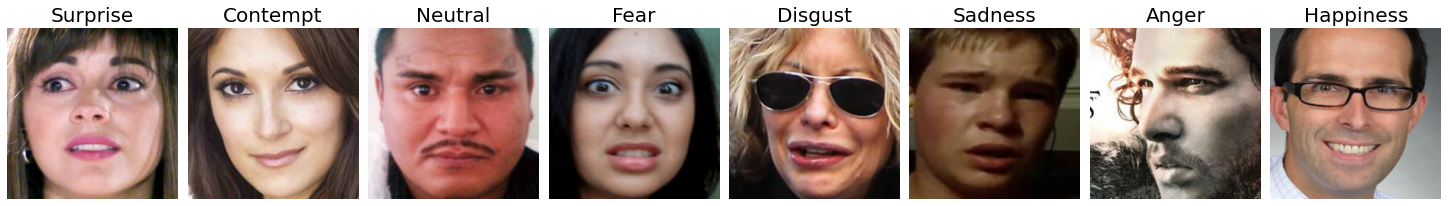

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4), ncols=8, constrained_layout=True)
for i,category in enumerate(os.listdir(dataset_train_here)):
  category_path = os.path.join(dataset_train_here,category)
  image  =  mpimg.imread(os.path.join(category_path,os.listdir(category_path)[0]))
  axs[i].imshow(image)  
  axs[i].set_title(category,fontsize = 20)
  axs[i].axis("off")

## data preprocessing 

In [ ]:
# load one image
image = Image.open(os.path.join(category_path,os.listdir(category_path)[4]))
# convert image to numpy array
data = np.asarray(image)

In [ ]:
print(np.shape(data))

Οι εικόνες που στέλνουμε στο νευρωνικό δίκτυο είναι aligned και resized σε 224*224 και είναι έγχρωμες (τιμές απο 0-255). <br>
 Έτσι στο δίκτυο οι πίνακες είναι μεγέθους 224 * 224 * 3. <br>Μειώνω τις διαστάσεις των εικόνων σε 112 * 112 * 3 

In [ ]:
# get batches of tensor image data (rescaled to 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32
# load and iterate training dataset
train_generator = train_datagen.flow_from_directory(
        './affectnet_train',
        target_size=(112, 112),
        color_mode='rgb', # 3 channels
        batch_size=batch_size,
        class_mode='categorical')

# load and iterate validation dataset (test images)
validation_generator = test_datagen.flow_from_directory(
        './affectnet_val',
        target_size=(112, 112),
        color_mode='rgb', # 3 channels
        batch_size=batch_size,
        class_mode='categorical')

Found 286594 images belonging to 8 classes.
Found 3986 images belonging to 8 classes.


## Class distribution

In [ ]:
train_counter = Counter(train_generator.classes)
val_counter = Counter(validation_generator.classes)

print(train_counter.items())
print(val_counter.items())

dict_items([(0, 24765), (1, 3743), (2, 3786), (3, 6339), (4, 134035), (5, 74565), (6, 25334), (7, 14027)])
dict_items([(0, 498), (1, 498), (2, 498), (3, 500), (4, 499), (5, 498), (6, 498), (7, 497)])


In [ ]:
def get_key(val):
    for key, value in (validation_generator.class_indices).items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [ ]:
images_counter = train_counter+val_counter
class_names_list = [get_key(emo_class) for emo_class in (images_counter).keys()]

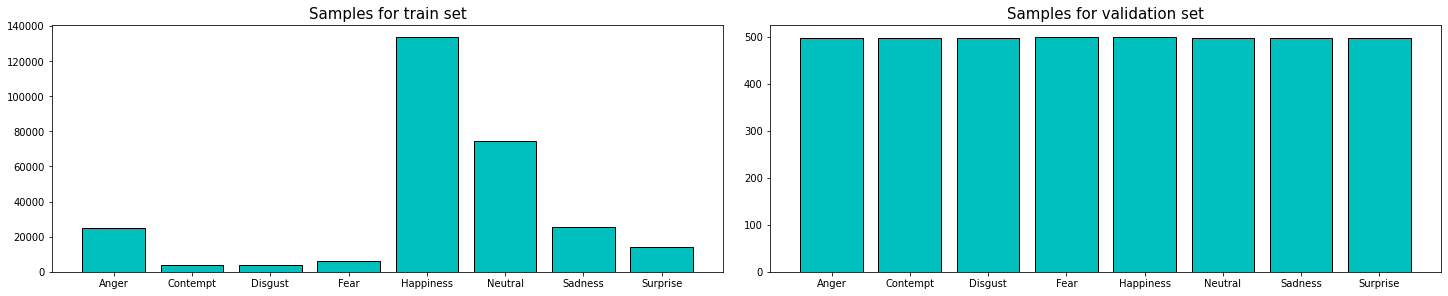

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4), ncols=2, constrained_layout=True)
sets = ['train','validation']
for i,set_counter in enumerate([train_counter,val_counter]):
  names_list = [get_key(emo_class) for emo_class in (set_counter).keys()]
  axs[i].bar(names_list,set_counter.values(),color='c',  edgecolor='black')
  axs[i].set_title("Samples for {} set".format(sets[i]),fontsize=15)


In [ ]:
def plot_samples(category_name,names,counter_train,counter_val):
  f, axs = plt.subplots(2,2,figsize=(15,4))
  plt.subplot(1, 2, 1) # row 1, col 2 index 1
  plt.bar(names,counter_train,color='c',  edgecolor='black')
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("{} for train set".format(category_name),fontsize=15)

  plt.subplot(1, 2, 2) # row 1, col 2 index 1
  plt.bar(names,counter_val,color='c',  edgecolor='black')
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("{} for validation set".format(category_name),fontsize=15)
  plt.show()


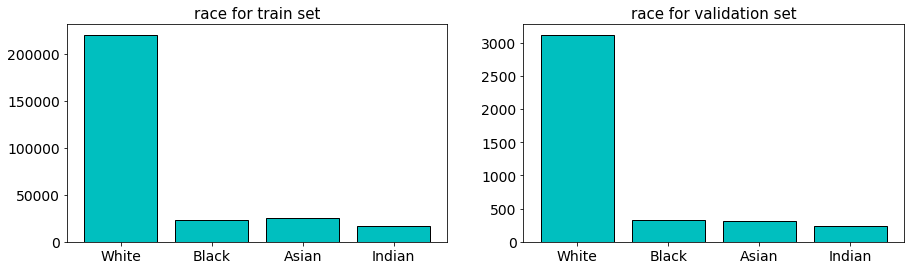

In [ ]:
race_names = ['White','Black','Asian','Indian']
#train set
race_counter_train = []
for i in range(len(race_names)):
  race_counter_train.append(len(df_train[df_train['race']==race_names[i]]))

#val set
race_counter_val = []
for i in range(len(race_names)):
  race_counter_val.append(len(df_val[df_val['race']==race_names[i]]))

plot_samples('race',race_names,race_counter_train,race_counter_val)


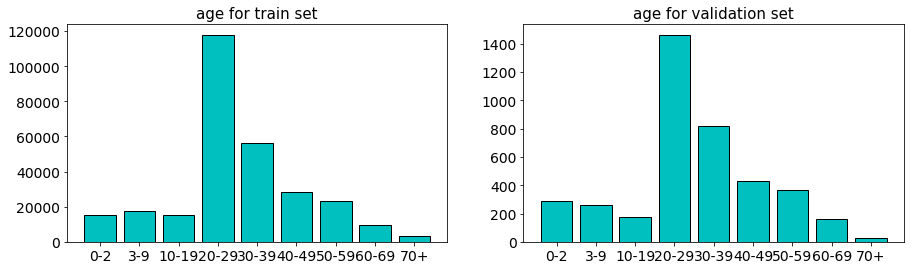

In [ ]:
age_names = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']

age_counter_train = []
for i in range(len(age_names)):
  age_counter_train.append(len(df_train[df_train['age']==age_names[i]]))

age_counter_val = []
for i in range(len(age_names)):
  age_counter_val.append(len(df_val[df_val['age']==age_names[i]]))


plot_samples('age',age_names,age_counter_train,age_counter_val)



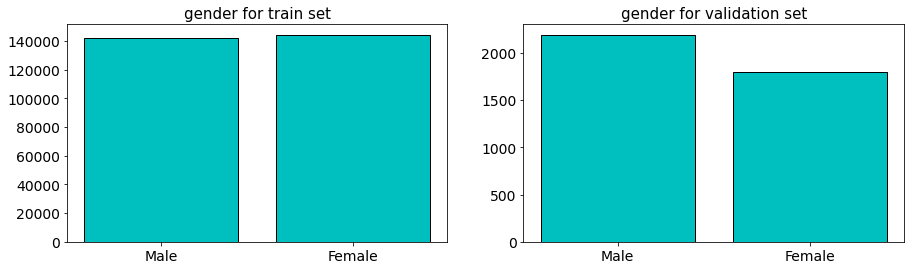

In [ ]:
gender_names = ['Male','Female']

gender_counter_train = []
for i in range(len(gender_names)):
  gender_counter_train.append(len(df_train[df_train['gender']==gender_names[i]]))

gender_counter_val = []
for i in range(len(gender_names)):
  gender_counter_val.append(len(df_val[df_val['gender']==gender_names[i]]))

plot_samples('gender',gender_names,gender_counter_train,gender_counter_val)



## training

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


USE: Resnet50 pretrained model

In [ ]:
#our model
resnet_model = Sequential()

#pretrained model
pretrained_model= tf.keras.applications.ResNet50(
    include_top=False, #custume input and output layers based on our data
    weights="imagenet", #use weights from imagenet training 
    input_tensor=None,
    input_shape=(112,112,3),
    pooling='avg' , #average
)
     
resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# see layers of resnet 50
#pretrained_model.summary()

In [ ]:
#resnet_model.add(Dense(512, activation='relu'))
#resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(8, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 24,640,904
Trainable params: 24,587,784
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy', f1_m])

In [ ]:
#checkpoint 
filepath = "/content/gdrive/MyDrive/train_net/ckp_models/AffectNet7/AffectNet7_no/AffectNet7_before/AffectNet7-{epoch:02d}.h5"

checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]


#fit model
history = resnet_model.fit(train_generator,validation_data=validation_generator,epochs=10,callbacks=callbacks_list)


Epoch 1/10
8957/8957 [==============================] - ETA: 0s - loss: 0.7655 - accuracy: 0.7333 - f1_m: 0.7207
Epoch 1: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNet7/AffectNet7_no/AffectNet7_before/AffectNet7-01.h5
8957/8957 [==============================] - 1123s 123ms/step - loss: 0.7655 - accuracy: 0.7333 - f1_m: 0.7207 - val_loss: 1.8214 - val_accuracy: 0.4425 - val_f1_m: 0.4326
Epoch 2/10
8957/8957 [==============================] - ETA: 0s - loss: 0.6556 - accuracy: 0.7673 - f1_m: 0.7607
Epoch 2: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNet7/AffectNet7_no/AffectNet7_before/AffectNet7-02.h5
8957/8957 [==============================] - 1105s 123ms/step - loss: 0.6556 - accuracy: 0.7673 - f1_m: 0.7607 - val_loss: 1.7045 - val_accuracy: 0.4631 - val_f1_m: 0.4486
Epoch 3/10
8957/8957 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.7896 - f1_m: 0.7849
Epoch 3: saving model to /content/gdrive/MyDrive/train_ne

## evaluation


In [ ]:
RACES =['White','Black','Asian','Indian']
AGES = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']
GENDERS = ['Male','Female']

In [ ]:
# load and iterate test dataset (test images) --> the same as validation test but not Shuffled
test_generator = test_datagen.flow_from_directory(
        './affectnet_val',
        target_size=(112,112),
        color_mode='rgb', # 3 channels
        batch_size=32,
        class_mode='categorical',
        shuffle = False) # for predictions and truth to line up

Found 3986 images belonging to 8 classes.


In [ ]:
models_labels = {}
models_predictions = {}
models_directory = '/content/gdrive/MyDrive/train_net/ckp_models/AffectNet7/AffectNet7_no/AffectNet7_before'

for saved_model in os.listdir(models_directory):
  model = tf.keras.models.load_model(os.path.join(models_directory,saved_model),custom_objects={'f1_m':f1_m})
  models_labels[saved_model[:-3]] = test_generator.classes
  Y_pred = model.predict(test_generator)
  models_predictions[saved_model[:-3]] = np.argmax(Y_pred, axis=1)


In [ ]:
#calculates f1 score and averaged accuracy
def f1_avgaccuracy(y_true,y_pred):
  f1 = f1_score(y_true,y_pred,average='macro')
  avg_accuracy = np.mean(recall_score(y_true, y_pred,average=None))
  
  return f1,avg_accuracy


In [ ]:
def predictions_labels_category(dataset_test_path,test_generator,df_test,labels,predictions,category_list,category_name):
  y_pred = {key: [] for key in category_list}
  y_true = {key: [] for key in category_list}
  category_counter = {key: [] for key in category_list} # values are list of indexes of each category


  for i,name in enumerate(test_generator.filenames):  
    image_name_gen = os.path.join(dataset_test_path,name[name.find('/')+1:])
    category_filename = df_test.loc[df_test['face_name_align'] == image_name_gen, category_name].item()
    for cat in category_list:
      if category_filename == cat:
        category_counter[cat].append(i)
        y_pred[cat].append(predictions[i])
        y_true[cat].append(labels[i])
    
  return y_true,y_pred,category_counter




In [ ]:
def results_category(split,category_list,category_name,y_true,y_pred,category_counter):
  print("{} scores {} split".format(category_name,split))
  data = []
  for i,cat in enumerate(category_list):
    data.append([cat,len(category_counter[cat]), f1_avgaccuracy(y_true[cat],y_pred[cat])[0],f1_avgaccuracy(y_true[cat],y_pred[cat])[1]])
  print(tabulate(data, headers=[category_name,"#images", "macro f1 score","averaged accuracy"]))
  print()



In [ ]:
for model_name in models_labels.keys():
  f1,avg_accuracy = f1_avgaccuracy(models_labels[model_name],models_predictions[model_name])
  print(" Model Name: {} f1score: {} AveragedAccuracy: {}".format(model_name,np.round(f1,3),round(avg_accuracy,3)))


 Model Name: AffectNet7-01 f1score: 0.398 AveragedAccuracy: 0.442
 Model Name: AffectNet7-02 f1score: 0.415 AveragedAccuracy: 0.463
 Model Name: AffectNet7-03 f1score: 0.424 AveragedAccuracy: 0.47
 Model Name: AffectNet7-04 f1score: 0.424 AveragedAccuracy: 0.466
 Model Name: AffectNet7-05 f1score: 0.449 AveragedAccuracy: 0.487
 Model Name: AffectNet7-06 f1score: 0.478 AveragedAccuracy: 0.502
 Model Name: AffectNet7-07 f1score: 0.453 AveragedAccuracy: 0.483
 Model Name: AffectNet7-08 f1score: 0.45 AveragedAccuracy: 0.479
 Model Name: AffectNet7-09 f1score: 0.45 AveragedAccuracy: 0.483
 Model Name: AffectNet7-10 f1score: 0.456 AveragedAccuracy: 0.488


In [ ]:
best_model_name = 'AffectNet7-06'
best_model = tf.keras.models.load_model(os.path.join(models_directory,"{}.h5".format(best_model_name)),custom_objects={'f1_m':f1_m})


In [ ]:
y_true_race,y_pred_race,counter_race = predictions_labels_category(dataset_val_path,test_generator,df_val,
                                                      models_labels[best_model_name],models_predictions[best_model_name],
                                                      RACES,'race')

y_true_age,y_pred_age,counter_age = predictions_labels_category(dataset_val_path,test_generator,df_val,
                                                    models_labels[best_model_name],models_predictions[best_model_name],
                                                    AGES,'age')

y_true_gender,y_pred_gender,counter_gender = predictions_labels_category(dataset_val_path,test_generator,df_val,
                                                          models_labels[best_model_name],models_predictions[best_model_name],
                                                          GENDERS,'gender')


In [ ]:
print("OVERALL scores before split")
data = [[f1_avgaccuracy(models_labels[best_model_name],models_predictions[best_model_name])[0],f1_avgaccuracy(models_labels[best_model_name],models_predictions[best_model_name])[1]]]
print(tabulate(data, headers=["f1 score", "averaged accuracy"]))
print()
results_category('before',RACES,'race',y_true_race,y_pred_race,counter_race)
results_category('before',AGES,'age',y_true_age,y_pred_age,counter_age)
results_category('before',GENDERS,'gender',y_true_gender,y_pred_gender,counter_gender)


OVERALL scores before split
  f1 score    averaged accuracy
----------  -------------------
  0.477663             0.502169

race scores before split
race      #images    macro f1 score    averaged accuracy
------  ---------  ----------------  -------------------
White        3120          0.479774             0.506322
Black         321          0.465186             0.490021
Asian         311          0.435802             0.455704
Indian        234          0.497799             0.522313

age scores before split
age      #images    macro f1 score    averaged accuracy
-----  ---------  ----------------  -------------------
0-2          288          0.438106             0.490572
3-9          257          0.515346             0.551549
10-19        177          0.44473              0.457586
20-29       1464          0.474277             0.485488
30-39        821          0.496579             0.528322
40-49        427          0.45249              0.481972
50-59        363          0.420348 

# After split

In [ ]:
df_info = pd.concat([df_train,df_val])

In [ ]:
df_info

,face_name_align,expression,race,gender,age
0,/content/train_set/images/102819.jpg,6,Indian,Male,30-39
1,/content/train_set/images/364716.jpg,1,White,Female,10-19
2,/content/train_set/images/50848.jpg,1,White,Female,20-29
3,/content/train_set/images/228471.jpg,7,Asian,Male,20-29
4,/content/train_set/images/324085.jpg,4,White,Female,20-29
...,...,...,...,...,...
3981,/content/val_set/images/374.jpg,7,White,Female,20-29
3982,/content/val_set/images/364.jpg,4,Black,Male,0-2
3983,/content/val_set/images/373.jpg,5,White,Female,30-39
3984,/content/val_set/images/371.jpg,7,White,Female,20-29


In [ ]:
def train_val_test_split(category):
  len_list = len(category)
  train_per = int(len_list*0.55)
  val_per = int(len_list*0.15)
  test_per = int(len_list*0.30)
  
  train_category = list(category['face_name_align'][:train_per])
  val_category = list(category['face_name_align'][train_per:train_per+val_per])
  test_category = list(category['face_name_align'][train_per+val_per:])

  return train_category,val_category,test_category



In [ ]:
CLASSES = list(df_info.sort_values('expression').expression.unique())
RACES =['White','Black','Asian','Indian']
AGES = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']
GENDERS = ['Male','Female']



In [ ]:
train_new = []
validation_new = []
test_new= []

for gender in GENDERS:
  for race in RACES:
    for age in AGES:
      for clas in CLASSES:
        print("gender:",gender,"race:",race,"age:",age,"class:",clas)
        df_category = df_info[(df_info['gender']==gender) & (df_info['race']==race) & (df_info['age']==age) & (df_info['expression']==clas)]      
        train_c,val_c,test_c = train_val_test_split(df_category)
        train_new.append(train_c)
        validation_new.append(val_c)
        test_new.append(test_c)
      
  

In [ ]:
train_list = list(np.concatenate(train_new).flat)
validation_list = list(np.concatenate(validation_new).flat)
test_list= list(np.concatenate(test_new).flat)


In [ ]:
len(train_list)+len(validation_list)+len(test_list)

In [ ]:
len(train_list),len(validation_list),len(test_list)

In [ ]:
df_train_fair = df_info[df_info['face_name_align'].isin(train_list)]
df_validation_fair = df_info[df_info['face_name_align'].isin(validation_list)]
df_test_fair = df_info[df_info['face_name_align'].isin(test_list)]

## seperate images to 11 directories

In [ ]:
def emo_num(num):
  emo =None
  if num==0: emo ='Neutral'
  elif num==1: emo='Happiness'
  elif num==2: emo='Sadness'
  elif num==3: emo='Surprise'
  elif num==4: emo='Fear'
  elif num==5: emo='Disgust'
  elif num==6: emo='Anger'
  elif num==7: emo='Contempt'
  elif num==8: emo='None'
  elif num==9: emo='Uncertain'
  elif num==10: emo='No-Face'
  return emo
  

In [ ]:
labels = df_train_fair.sort_values('expression')
class_names = list(labels.expression.unique())
class_names

In [ ]:
dataset_train_fair= '/content/affectnet_train_fair'
dataset_val_fair = '/content/affectnet_val_fair'
dataset_test_fair = '/content/affectnet_test_fair'

In [ ]:
#TRAIN SET
#make directories for each class
for i in class_names:
    os.makedirs(os.path.join(dataset_train_fair,str(i)))

#create path images
for class_name in class_names:      # for each class          
  for image_name in list(df_train_fair[df_train_fair['expression']== class_name]['face_name_align']):   #get images of that class    
    get_image = os.path.join(image_name) #get image original path
    move_image = shutil.copy(get_image,os.path.join(dataset_train_fair,str(class_name))) #move image to class directory

#VAL SET
#make directories for each class
for i in class_names:
    os.makedirs(os.path.join(dataset_val_fair,str(i)))

#create path images
for class_name in class_names:      # for each class          
  for image_name in list(df_validation_fair[df_validation_fair['expression']== class_name]['face_name_align']):   #get images of that class    
    get_image = os.path.join(image_name) #get image original path
    move_image = shutil.copy(get_image,os.path.join(dataset_val_fair,str(class_name))) #move image to class directory

#TEST SET
#make directories for each class
for i in class_names:
    os.makedirs(os.path.join(dataset_test_fair,str(i)))

#create path images
for class_name in class_names:      # for each class          
  for image_name in list(df_test_fair[df_test_fair['expression']== class_name]['face_name_align']):   #get images of that class    
    get_image = os.path.join(image_name) #get image original path
    move_image = shutil.copy(get_image,os.path.join(dataset_test_fair,str(class_name))) #move image to class directory



In [ ]:
#rename numerical values to emotions 
for dir in os.listdir(dataset_train_fair): 
  os.rename(os.path.join(dataset_train_fair,dir),os.path.join(dataset_train_fair,emo_num(int(dir))))
for dir in os.listdir(dataset_val_fair): 
  os.rename(os.path.join(dataset_val_fair,dir),os.path.join(dataset_val_fair,emo_num(int(dir))))
for dir in os.listdir(dataset_test_fair): 
  os.rename(os.path.join(dataset_test_fair,dir),os.path.join(dataset_test_fair,emo_num(int(dir))))

##Show data

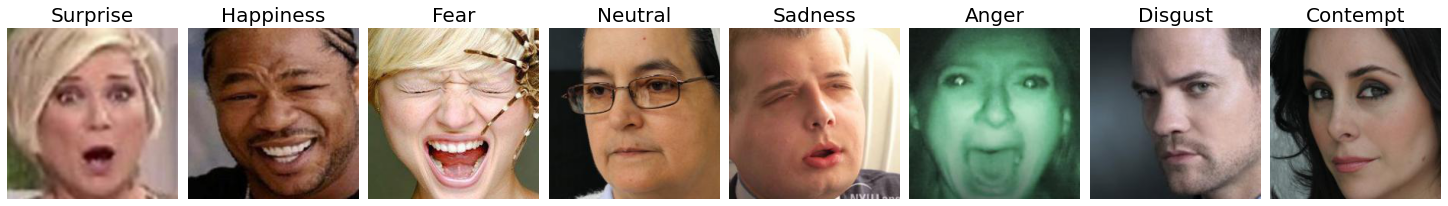

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4), ncols=8, constrained_layout=True)
for i,category in enumerate(os.listdir(dataset_train_fair)):
  category_path = os.path.join(dataset_train_fair,category)
  image  =  mpimg.imread(os.path.join(category_path,os.listdir(category_path)[10]))
  axs[i].imshow(image)  
  axs[i].set_title(category,fontsize = 20)
  axs[i].axis("off")



## data preprocessing 

In [ ]:
# get batches of tensor image data (rescaled to 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32
# load and iterate training dataset
train_generator = train_datagen.flow_from_directory(
        './affectnet_train_fair',
        target_size=(112, 112),
        color_mode='rgb', # 3 channels
        batch_size=batch_size,
        class_mode='categorical')

# load and iterate validation dataset 
validation_generator = val_datagen.flow_from_directory(
        './affectnet_val_fair',
        target_size=(112, 112),
        color_mode='rgb', # 3 channels
        batch_size=batch_size,
        class_mode='categorical')

# load and iterate test dataset 
test_generator = test_datagen.flow_from_directory(
        './affectnet_test_fair',
        target_size=(112, 112),
        color_mode='rgb', # 3 channels
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False) #test set

Found 159540 images belonging to 8 classes.
Found 43330 images belonging to 8 classes.
Found 87611 images belonging to 8 classes.


## Class distribution

In [ ]:
train_counter = Counter(train_generator.classes)
val_counter = Counter(validation_generator.classes)
test_counter = Counter(test_generator.classes)
print(train_counter.items())
print(val_counter.items())
print(test_counter.items())

dict_items([(0, 13859), (1, 2299), (2, 2318), (3, 3729), (4, 73958), (5, 41252), (6, 14174), (7, 7951)])
dict_items([(0, 3755), (1, 610), (2, 611), (3, 997), (4, 20144), (5, 11223), (6, 3842), (7, 2148)])
dict_items([(0, 7644), (1, 1332), (2, 1355), (3, 2112), (4, 40371), (5, 22571), (6, 7805), (7, 4421)])


In [ ]:
def get_key(val):
    for key, value in (validation_generator.class_indices).items():
         if val == value:
             return key
 
    return "key doesn't exist"

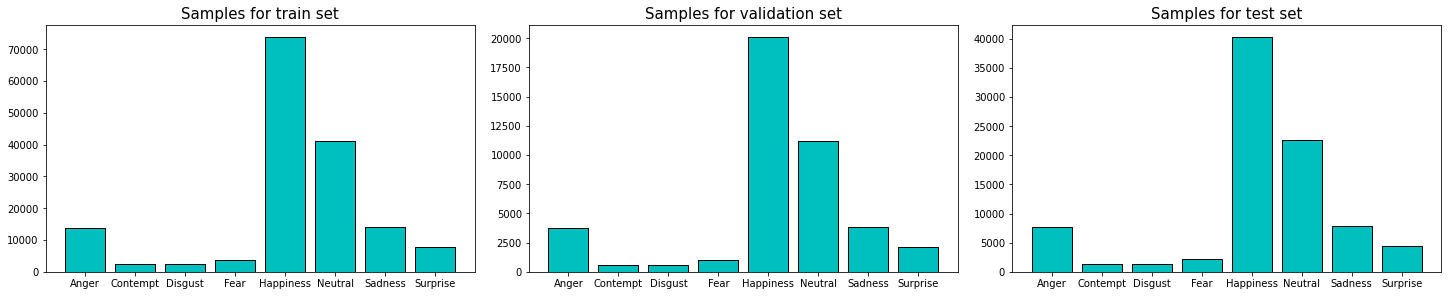

In [ ]:
fig, axs = plt.subplots(figsize=(20, 4), ncols=3, constrained_layout=True)
sets = ['train','validation','test']
for i,set_counter in enumerate([train_counter,val_counter,test_counter]):
  names_list = [get_key(emo_class) for emo_class in (set_counter).keys()]
  axs[i].bar(names_list,set_counter.values(),color='c',  edgecolor='black')
  axs[i].set_title("Samples for {} set".format(sets[i]),fontsize=15)


Παρατηρώ ότι μετά απο το fair split τα δεδομένα και στα 3 σύνολα έχουν την ίδια κατανομή 

In [ ]:
def plot_samples(names,counter,text):
  plt.figure(figsize=(6, 4))
  plt.bar(names,counter,color='c',  edgecolor='black')
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title(text,fontsize=15)
  plt.show()

In [ ]:
def plot_samples(category,names,train_counter,val_counter,test_counter):
  fig, axs = plt.subplots(figsize=(20, 4), ncols=3, constrained_layout=True)
  sets = ['train','validation','test']
  for i,set_counter in enumerate([train_counter,val_counter,test_counter]):
    names_list = [name for name in names]
    axs[i].bar(names_list,set_counter,color='c',  edgecolor='black')
    axs[i].set_title("{} distribution for {} set".format(category,sets[i]),fontsize=15)

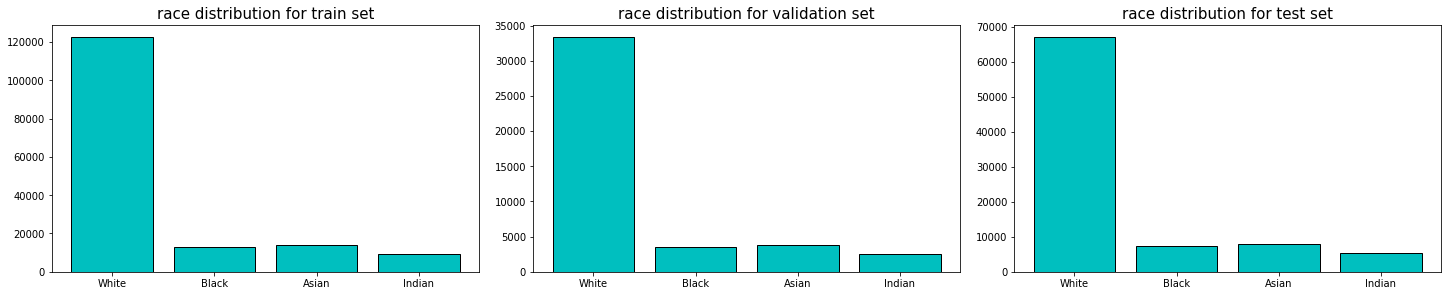

In [ ]:
race_names = ['White','Black','Asian','Indian']

race_counter_train = []
for i in range(len(race_names)):
  race_counter_train.append(len(df_train_fair[df_train_fair['race']==race_names[i]]))

race_counter_val = []
for i in range(len(race_names)):
  race_counter_val.append(len(df_validation_fair[df_validation_fair['race']==race_names[i]]))

race_counter_test = []
for i in range(len(race_names)):
  race_counter_test.append(len(df_test_fair[df_test_fair['race']==race_names[i]]))


plot_samples('race',race_names,race_counter_train,race_counter_val,race_counter_test)


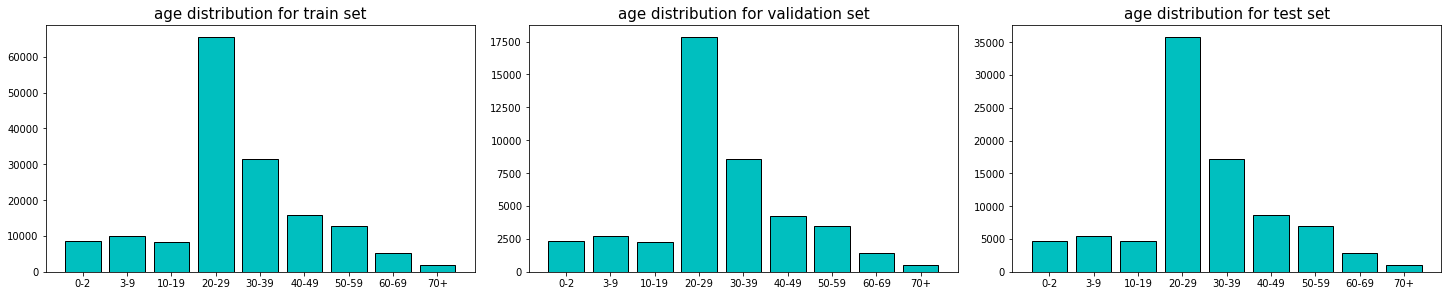

In [ ]:
age_names = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']

age_counter_train = []
for i in range(len(age_names)):
  age_counter_train.append(len(df_train_fair[df_train_fair['age']==age_names[i]]))

age_counter_val = []
for i in range(len(age_names)):
  age_counter_val.append(len(df_validation_fair[df_validation_fair['age']==age_names[i]]))

age_counter_test = []
for i in range(len(age_names)):
  age_counter_test.append(len(df_test_fair[df_test_fair['age']==age_names[i]]))

plot_samples('age',age_names,age_counter_train,age_counter_val,age_counter_test)


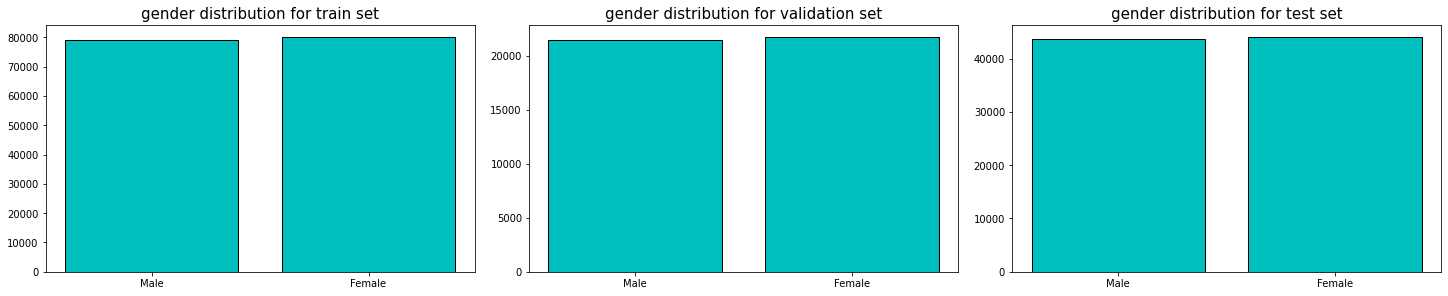

In [ ]:
gender_names = ['Male','Female']

gender_counter_train = []
for i in range(len(gender_names)):
  gender_counter_train.append(len(df_train_fair[df_train_fair['gender']==gender_names[i]]))

gender_counter_val = []
for i in range(len(gender_names)):
  gender_counter_val.append(len(df_validation_fair[df_validation_fair['gender']==gender_names[i]]))

gender_counter_test = []
for i in range(len(gender_names)):
  gender_counter_test.append(len(df_test_fair[df_test_fair['gender']==gender_names[i]]))

plot_samples('gender',gender_names,gender_counter_train,gender_counter_val,gender_counter_test)


## training

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


USE: Resnet50 pretrained model

In [ ]:
#our model
resnet_model = Sequential()

#pretrained model
pretrained_model= tf.keras.applications.ResNet50(
    include_top=False, #custume input and output layers based on our data
    weights="imagenet", #use weights from imagenet training 
    input_tensor=None,
    input_shape=(112,112,3),
    pooling='avg' , #average
)
     
resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# see layers of resnet 50
#pretrained_model.summary()

In [ ]:
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(8, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 24,640,904
Trainable params: 24,587,784
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy', f1_m])

In [ ]:
#checkpoint 
filepath = "/content/gdrive/MyDrive/train_net/ckp_models/AffectNet7/AffectNet7_no/AffectNet7_after/AffectNet7-{epoch:02d}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]


#fit model
history = resnet_model.fit(train_generator,validation_data=validation_generator,epochs=10,callbacks=callbacks_list)


Epoch 1/10
4986/4986 [==============================] - ETA: 0s - loss: 0.8130 - accuracy: 0.7186 - f1_m: 0.7020
Epoch 1: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNet7/AffectNet7_no/AffectNet7_after/AffectNet7-01.h5
4986/4986 [==============================] - 702s 139ms/step - loss: 0.8130 - accuracy: 0.7186 - f1_m: 0.7020 - val_loss: 0.7544 - val_accuracy: 0.7336 - val_f1_m: 0.7195
Epoch 2/10
4986/4986 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.7609 - f1_m: 0.7533
Epoch 2: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNet7/AffectNet7_no/AffectNet7_after/AffectNet7-02.h5
4986/4986 [==============================] - 672s 135ms/step - loss: 0.6784 - accuracy: 0.7609 - f1_m: 0.7533 - val_loss: 0.7176 - val_accuracy: 0.7456 - val_f1_m: 0.7375
Epoch 3/10
4986/4986 [==============================] - ETA: 0s - loss: 0.5827 - accuracy: 0.7908 - f1_m: 0.7864
Epoch 3: saving model to /content/gdrive/MyDrive/train_net/ck

## evaluation


In [ ]:
def predictions_labels_category(dataset_test_path,test_generator,df_test,labels,predictions,category_list,category_name):
  y_pred = {key: [] for key in category_list}
  y_true = {key: [] for key in category_list}
  category_counter = {key: [] for key in category_list} # values are list of indexes of each category


  for i,name in enumerate(test_generator.filenames):  
    image_name_gen = os.path.join(dataset_test_path,name[name.find('/')+1:])
    category_filename = df_test.loc[df_test['face_name_align'] == image_name_gen, category_name].item()
    for cat in category_list:
      if category_filename == cat:
        category_counter[cat].append(i)
        y_pred[cat].append(predictions[i])
        y_true[cat].append(labels[i])
    
  return y_true,y_pred,category_counter




In [ ]:
def predictions_labels_category_fair(test_generator,df_test,labels,predictions,category_list,category_name):
  y_pred = {key: [] for key in category_list}
  y_true = {key: [] for key in category_list}
  category_counter = {key: [] for key in category_list} # values are list of indexes of each category


  for i,name in enumerate(test_generator.filenames):  
    image_name = name[name.find('/')+1:]  
    image_name_gen_train = os.path.join(dataset_train_path,image_name)
    image_name_gen_val = os.path.join(dataset_val_path,image_name)
    
    if image_name_gen_train in df_test['face_name_align'].unique():
      image_name_gen = image_name_gen_train
    elif image_name_gen_val in df_test['face_name_align'].unique():
      image_name_gen = image_name_gen_val
    
    category_filename = df_test.loc[df_test['face_name_align'] == image_name_gen, category_name].item()
    for cat in category_list:
      if category_filename == cat:
        category_counter[cat].append(i)
        y_pred[cat].append(predictions[i])
        y_true[cat].append(labels[i])
    
  return y_true,y_pred,category_counter




In [ ]:
RACES =['White','Black','Asian','Indian']
AGES = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']
GENDERS = ['Male','Female']

In [ ]:
models_labels_fair = {}
models_predictions_fair = {}
models_directory_fair = '/content/gdrive/MyDrive/train_net/ckp_models/AffectNet7/AffectNet7_no/AffectNet7_after'
for saved_model in os.listdir(models_directory_fair):
  model = tf.keras.models.load_model(os.path.join(models_directory_fair,saved_model),custom_objects={'f1_m':f1_m})
  models_labels_fair[saved_model[:-3]] = test_generator.classes
  Y_pred = model.predict(test_generator)
  models_predictions_fair[saved_model[:-3]] = np.argmax(Y_pred, axis=1)


In [ ]:
for model_name in models_labels_fair.keys():
  f1,avg_accuracy = f1_avgaccuracy(models_labels_fair[model_name],models_predictions_fair[model_name])
  print(" Model Name: {} f1score: {} AveragedAccuracy: {}".format(model_name,np.round(f1,3),round(avg_accuracy,3)))


 Model Name: AffectNet7-01 f1score: 0.463 AveragedAccuracy: 0.453
 Model Name: AffectNet7-02 f1score: 0.489 AveragedAccuracy: 0.466
 Model Name: AffectNet7-03 f1score: 0.505 AveragedAccuracy: 0.48
 Model Name: AffectNet7-04 f1score: 0.5 AveragedAccuracy: 0.493
 Model Name: AffectNet7-05 f1score: 0.49 AveragedAccuracy: 0.459
 Model Name: AffectNet7-06 f1score: 0.481 AveragedAccuracy: 0.468
 Model Name: AffectNet7-07 f1score: 0.496 AveragedAccuracy: 0.468
 Model Name: AffectNet7-08 f1score: 0.487 AveragedAccuracy: 0.459
 Model Name: AffectNet7-09 f1score: 0.479 AveragedAccuracy: 0.475
 Model Name: AffectNet7-10 f1score: 0.487 AveragedAccuracy: 0.466


In [ ]:
best_model_name_fair = 'AffectNet7-04'
best_model_fair = tf.keras.models.load_model(os.path.join(models_directory_fair,"{}.h5".format(best_model_name_fair)),custom_objects={'f1_m':f1_m})


In [ ]:
y_true_race_fair,y_pred_race_fair,counter_race = predictions_labels_category_fair(test_generator,df_test_fair,
                                                      models_labels_fair[best_model_name_fair],models_predictions_fair[best_model_name_fair],
                                                      RACES,'race')

y_true_age_fair,y_pred_age_fair,counter_age = predictions_labels_category_fair(test_generator,df_test_fair,
                                                    models_labels_fair[best_model_name_fair],models_predictions_fair[best_model_name_fair],
                                                    AGES,'age')

y_true_gender_fair,y_pred_gender_fair,counter_gender = predictions_labels_category_fair(test_generator,df_test_fair,
                                                          models_labels_fair[best_model_name_fair],models_predictions_fair[best_model_name_fair],
                                                          GENDERS,'gender')


In [ ]:
print("OVERALL scores after split")
data = [[f1_avgaccuracy(models_labels_fair[best_model_name_fair],models_predictions_fair[best_model_name_fair])[0],
         f1_avgaccuracy(models_labels_fair[best_model_name_fair],models_predictions_fair[best_model_name_fair])[1]]]
print(tabulate(data, headers=["f1 score", "averaged accuracy"]))
print()
results_category('after',RACES,'race',y_true_race_fair,y_pred_race_fair,counter_race)
results_category('after',AGES,'age',y_true_age_fair,y_pred_age_fair,counter_age)
results_category('after',GENDERS,'gender',y_true_gender_fair,y_pred_gender_fair,counter_gender)


OVERALL scores after split
  f1 score    averaged accuracy
----------  -------------------
  0.499775             0.493044

race scores after split
race      #images    macro f1 score    averaged accuracy
------  ---------  ----------------  -------------------
White       67076          0.502136             0.496661
Black        7308          0.504095             0.491533
Asian        7884          0.46661              0.460277
Indian       5343          0.488595             0.477262

age scores after split
age      #images    macro f1 score    averaged accuracy
-----  ---------  ----------------  -------------------
0-2         4742          0.52222              0.512013
3-9         5465          0.53561              0.524048
10-19       4645          0.478302             0.460981
20-29      35861          0.498641             0.487724
30-39      17219          0.506694             0.502373
40-49       8658          0.474974             0.470573
50-59       7050          0.461233    